Данные успешно загружены с кодировкой: latin1

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB
None

Описательная статистика:
                Rk          Age         Born           MP       Starts  \
count  2689.000000  2689.000000  2689.000000  2689.000000  2689.000000   
mean   1345.000000    26.011157  1996.155820    11.833023     8.476013   
std     776.391761     4.446259     4.450108     6.864278     6.994383   
min       1.000000    15.000000  1981.000000     1.000000     0.000000   
25%     673.000000    23.000000  1993.000000     5.000000     2.000000   
50%    1345.000000    26.000000  1996.000000    13.000000     7.000000   
75%    2017.000000    29.000000  2000.000000    18.000000    14.000000   
max    2689.000000    41.000000  2007.000000    23.000000    23.000000   

               Min          90s        Goals        Shots   

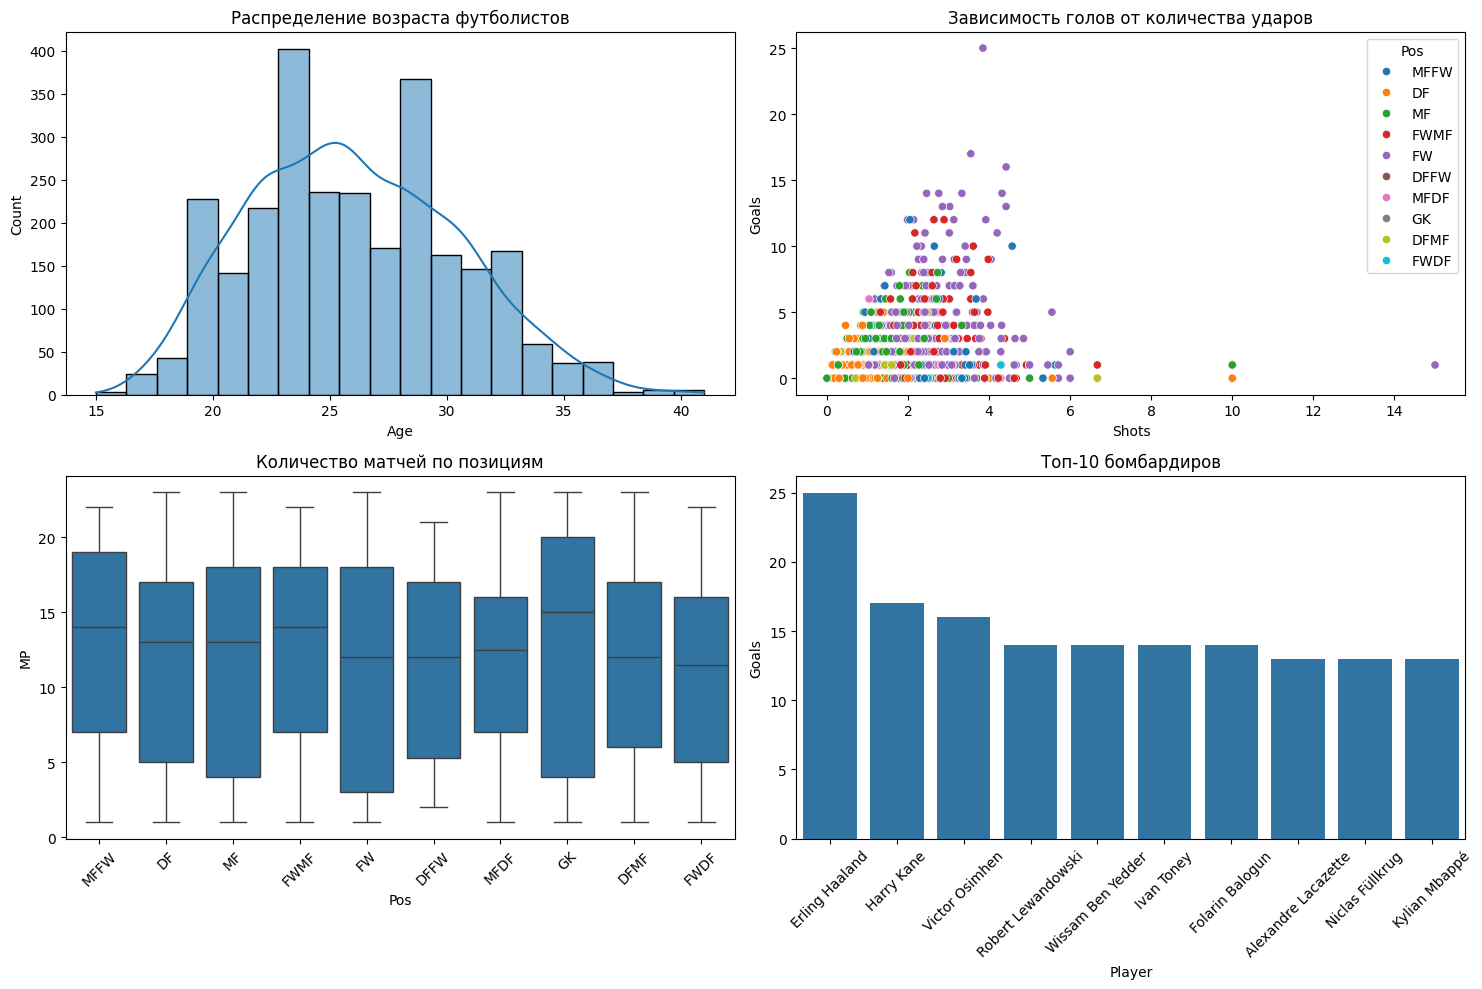

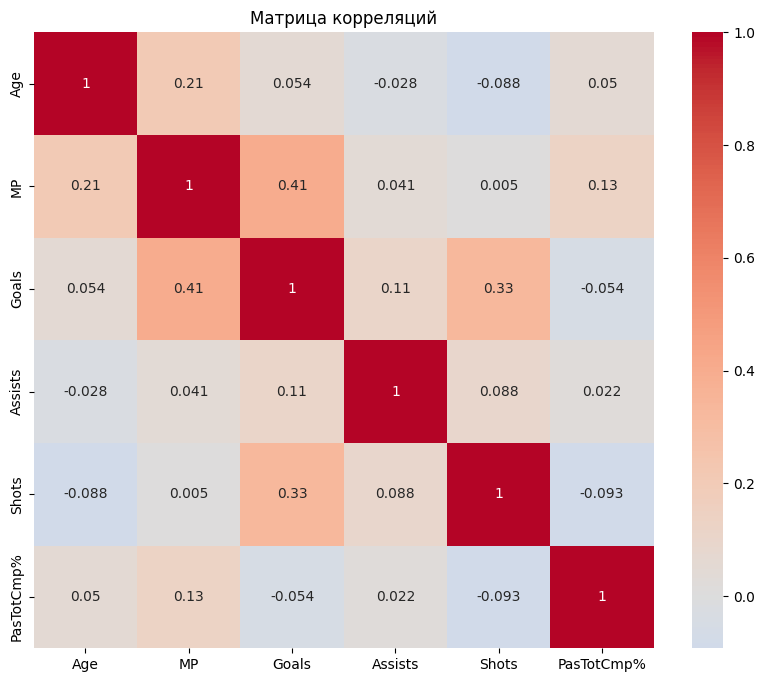

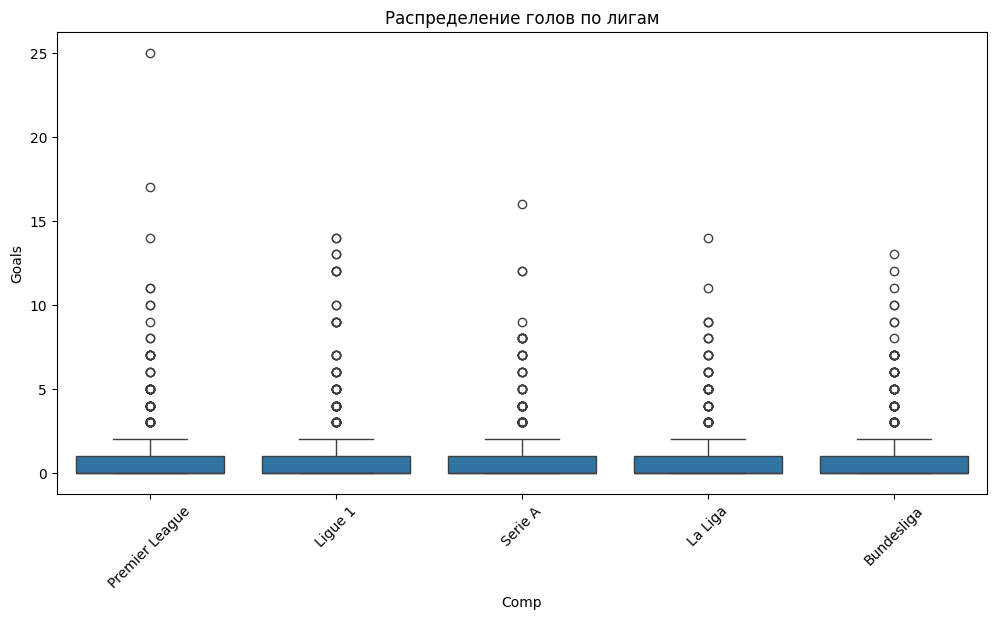

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def load_football_data(file_path):
    # Список возможных кодировок для попытки
    encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252', 'utf-16']
    
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, sep=';', encoding=enc)
            print(f"Данные успешно загружены с кодировкой: {enc}")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"Ошибка при загрузке с кодировкой {enc}: {str(e)}")
            continue
    
    print("Не удалось загрузить данные. Проверьте файл и кодировку.")
    return None

# Загружаем данные
file_path = '2022-2023 Football Player Stats.csv'
df = load_football_data(file_path)

if df is not None:
    # Базовый анализ данных
    print("\nИнформация о данных:")
    print(df.info())
    
    print("\nОписательная статистика:")
    print(df.describe())
    
    # Визуализация данных
    plt.figure(figsize=(15, 10))
    
    # 1. Распределение возраста
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='Age', bins=20, kde=True)
    plt.title('Распределение возраста футболистов')
    
    # 2. Голы vs Удары
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='Shots', y='Goals', hue='Pos')
    plt.title('Зависимость голов от количества ударов')
    
    # 3. Матчи по позициям
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Pos', y='MP')
    plt.title('Количество матчей по позициям')
    plt.xticks(rotation=45)
    
    # 4. Топ-10 бомбардиров
    plt.subplot(2, 2, 4)
    top_scorers = df.sort_values('Goals', ascending=False).head(10)
    sns.barplot(data=top_scorers, x='Player', y='Goals')
    plt.title('Топ-10 бомбардиров')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Дополнительный анализ
    # Корреляционная матрица
    corr_columns = ['Age', 'MP', 'Goals', 'Assists', 'Shots', 'PasTotCmp%']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[corr_columns].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Матрица корреляций')
    plt.show()
    
    # Анализ по лигам (если есть столбец Comp)
    if 'Comp' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Comp', y='Goals')
        plt.title('Распределение голов по лигам')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("Не удалось загрузить данные для анализа")